In [1]:
# Importar librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Lectura y procesamiento de datos

1. En el repositorio se encuentra el archivo `bikes.csv` el cual contiene información sobre la renta de bicicletas en la ciudad de Montreal, el cual tiene las siguientes características:
 - El indicador de separación de columnas es el punto y coma ‘;’, en lugar de la coma ‘,’
 - El archivo está codificado en `latin 1` y no en `utf-8` como es habitual en los archivos modernos.
 - La columna Date tiene el formato `dd/mm/yyyy`.

El archivo contiene la información de la cantidad de bicicletas que se retiraron de dicha estación por día (De algunas estacones no se cuenta con datos, o no con todos los datos).

2. Leer el archivo (usar el lenguaje de programación de su preferencia).

In [2]:
# Leer datos de renta de bicicletas y guardar como dataframe
bikes_df = pd.read_csv('bikes.csv',sep=';')
bikes_df.head()

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN
4,05/01/2012,197,NaN,2,124,330,97,13,95,NaN


In [3]:
# Transformar la columna Date en tipo datetime para mayor facilidad de manipulacion
bikes_df['Date'] = pd.to_datetime(bikes_df['Date'],format='%d/%m/%Y')
print(bikes_df['Date'].dtype)

datetime64[ns]


In [4]:
# Revisar los tipos de datos y valores nulos
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 310 non-null    datetime64[ns]
 1   Berri 1                              310 non-null    int64         
 2   Brébeuf (données non disponibles)    0 non-null      float64       
 3   Côte-Sainte-Catherine                310 non-null    int64         
 4   Maisonneuve 1                        310 non-null    int64         
 5   Maisonneuve 2                        310 non-null    int64         
 6   du Parc                              310 non-null    int64         
 7   Pierre-Dupuy                         310 non-null    int64         
 8   Rachel1                              310 non-null    int64         
 9   St-Urbain (données non disponibles)  0 non-null      float64       
dtypes: datetime64[

In [5]:
# La estacion Brebeuf y St-Urbain no contienen ningun dato no nulo, podemos removerlas
bikes_df.drop(columns=['Brébeuf (données non disponibles)','St-Urbain (données non disponibles)'],inplace=True)

# Revisamos como queda nuestra dataframe
bikes_df.sample(5)

,Date,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
243,2012-08-31,4106,1868,2999,5054,2541,875,4188
0,2012-01-01,35,0,38,51,26,10,16
274,2012-10-01,3255,1576,2184,3830,2582,397,2987
247,2012-09-04,4225,1934,3057,5275,3006,894,3868
135,2012-05-15,3964,1773,3144,5088,2650,975,3765


3. Graficar la cantidad de bicicletas retiradas por día para la estación 'Berri 1’.

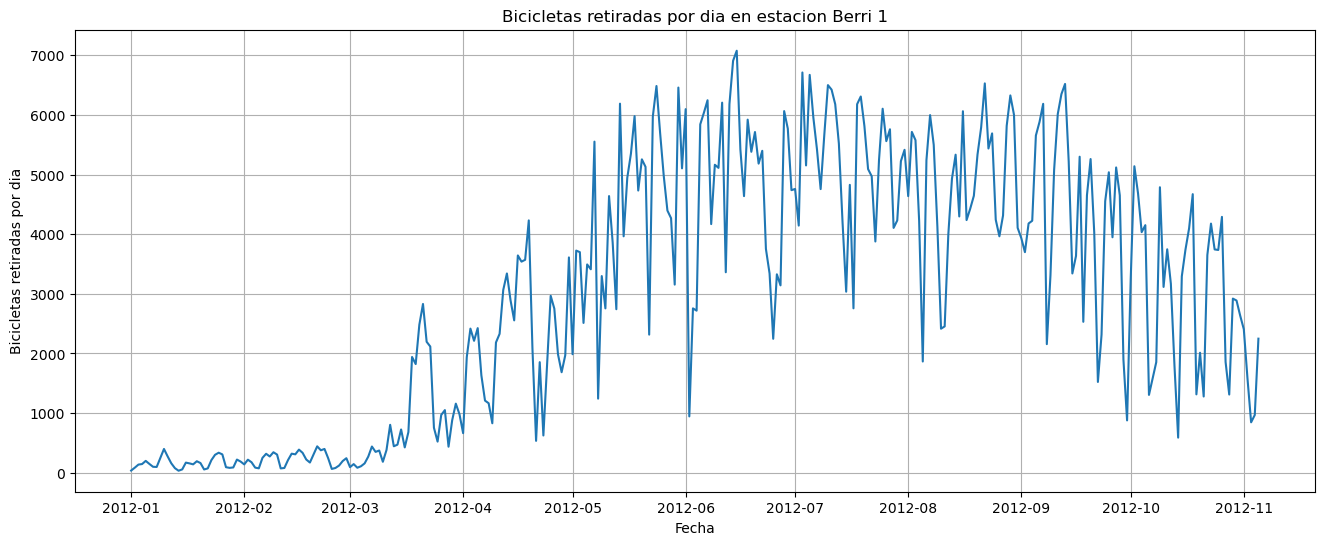

In [6]:
fig, ax1 = plt.subplots()

sns.lineplot(x='Date',y='Berri 1',data=bikes_df, ax=ax1)

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Bicicletas retiradas por dia')
ax1.set_title('Bicicletas retiradas por dia en estacion Berri 1')
ax1.grid(True)

fig.set_size_inches(16,6)

plt.show() # Datos solo llegan hasta noviembre

4. Extraer el número de trayectos acumulados realizado por estación y por més del año.

In [7]:
months_df = bikes_df.groupby(by=bikes_df.Date.dt.month_name()).sum()

#Reordenar meses
months_order = ['January','February','March','April','May','June','July','August','September','October','November']

# Aplicar nuevo orden y mostar datos
months_df.index.names = ['Month']
months_df.reindex(months_order,axis=0)

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Month,,,,,,,
January,4915,38,3308,7737,3088,160,1140
February,6712,51,4573,10226,4852,240,73
March,26229,11388,18194,35736,21487,6634,26437
April,67699,29137,49312,85786,46048,16195,71759
May,133274,54360,94224,154609,78355,50130,129590
June,144849,58826,95213,169227,86190,53043,146530
July,162562,59657,101969,182673,88010,80033,150703
August,149227,61589,95110,168556,84261,57583,137377
September,127061,57986,83540,147277,86611,42328,123757


5. Extraer el número de trayectos promedio por estación (y de ser posible su desviación estandar) realizados por cada día de la semana (`lunes`, `martes`, `miércoles`, `jueves`, `viernes`, `sabado`, `domingo`).

In [8]:
days_df = bikes_df.groupby(by=bikes_df.Date.dt.day_name()).agg([np.mean,np.std])

days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

days_df.index.names = ['Weekday']
days_df.reindex(days_order,axis=0)

/var/folders/cl/311htkxn4hz7spwv1t4czmzw0000gn/T/ipykernel_5163/3994616035.py:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  days_df = bikes_df.groupby(by=bikes_df.Date.dt.day_name()).agg([np.mean,np.std])


Berri 1              Côte-Sainte-Catherine               \
                  mean          std                  mean          std   
Weekday                                                                  
Monday     2984.400000  2093.291975           1340.644444   973.810630   
Tuesday    3075.113636  2151.083580           1334.272727   989.311162   
Wednesday  3476.636364  2302.985737           1530.545455  1066.272282   
Thursday   3639.340909  2370.078754           1568.818182  1061.620619   
Friday     3222.068182  2288.254361           1282.863636   915.197236   
Saturday   2308.590909  1866.266405            773.136364   574.566311   
Sunday     2206.888889  1771.607016            810.355556   623.040680   

          Maisonneuve 1              Maisonneuve 2                   du Parc  \
                   mean          std          mean          std         mean   
Weekday                                                                        
Monday      2001.133333  1387.750626   3639.266667  2402.431348  2004.088889   
Tuesday     2091.704545  1401.825331   3770.000000  2470.963902  2077.250000   
Wednesday   2383.886364  1557.945893   4228.659091  2665.287052  2320.522727   
Thursday    2543.068182  1639.331165   4470.795455  2783.461669  2401.681818   
Friday      2240.181818  1563.948793   3917.954545  2620.149267  2042.545455   
Saturday    1410.613636  1109.430070   2387.727273  1778.650212  1097.477273   
Sunday      1229.422222   938.555503   2184.622222  1601.702011  1111.200000   

                       Pierre-Dupuy                   Rachel1               
                   std         mean          std         mean          std  
Weekday                                                                     
Monday     1342.144634  1026.755556  1030.123363  2891.777778  2010.232538  
Tuesday    1355.391441   799.250000   853.407237  2729.272727  1939.308512  
Wednesday  1442.777159   983.250000   933.515190  3024.727273  2044.024705  
Thursday   1463.745511  1031.477273   912.220559  3187.295455  2116.135108  
Friday     1339.290431   965.227273   939.619935  3119.431818  2222.013621  
Saturday    769.830984  1201.386364  1232.688935  2564.272727  1964.864719  
Sunday      806.868543  1366.333333  1401.679172  2603.333333  2014.706836

6. Guardar la información generada en un archivo tipo json. Documentar la estructura del archivo json.

In [24]:
#bikes_df.to_json('bikes.json') # Columnda Date se convierte en timestamp UNIX
#months_df.to_json('months.json')
days_df.to_json('days.json') # Solo guardamos la ultima dataframe

In [25]:
# Imprimir contenidos del JSON generado
days = days_df.to_json()
bikes_json = json.loads(bikesJSON)
print(json.dumps(bikes_json, indent=3))

{
   "('Berri 1', 'mean')": {
      "Friday": 3222.0681818182,
      "Monday": 2984.4,
      "Saturday": 2308.5909090909,
      "Sunday": 2206.8888888889,
      "Thursday": 3639.3409090909,
      "Tuesday": 3075.1136363636,
      "Wednesday": 3476.6363636364
   },
   "('Berri 1', 'std')": {
      "Friday": 2288.2543605331,
      "Monday": 2093.2919745963,
      "Saturday": 1866.2664048492,
      "Sunday": 1771.6070160145,
      "Thursday": 2370.0787538989,
      "Tuesday": 2151.0835800084,
      "Wednesday": 2302.9857373753
   },
   "('C\u00f4te-Sainte-Catherine', 'mean')": {
      "Friday": 1282.8636363636,
      "Monday": 1340.6444444444,
      "Saturday": 773.1363636364,
      "Sunday": 810.3555555556,
      "Thursday": 1568.8181818182,
      "Tuesday": 1334.2727272727,
      "Wednesday": 1530.5454545455
   },
   "('C\u00f4te-Sainte-Catherine', 'std')": {
      "Friday": 915.1972361041,
      "Monday": 973.8106301712,
      "Saturday": 574.5663113069,
      "Sunday": 623.0406799631,